In [4]:
import random
import timeit
# Criar listas de tamanhos diferentes
lista_pequena = random.sample(range(1,100), 10)
lista_grande = random.sample(range(1,20000), 10000)
# Elementos a serem buscados (último de ada lista)
alvo_pequeno = lista_pequena[-1]
alvo_grande = lista_grande[1]
# Código para timeit (igual para ambos os casos)
codigo_teste_pequena = 'alvo_pequeno in lista_pequena'
codigo_teste_grande = 'alvo_grande in lista_grande'
# Medir tempo para lista pequena
tempo_pequena = timeit.timeit(stmt=codigo_teste_pequena, globals=globals(), number=1000)
# Medir tempo para lista grande
tempo_grande = timeit.timeit(stmt=codigo_teste_grande, globals=globals(), number=1000)
# Exibir os resultados
print("🔍 Comparação de busca linear (último elemento)")
print(f"Lista com 10 elementos: {tempo_pequena:.6f} s (média: {tempo_pequena/1000:.10f} s)")
print(f"Lista com 10000 elementos: {tempo_grande:.6f} s (média: {tempo_grande/1000:.10f} s)")

🔍 Comparação de busca linear (último elemento)
Lista com 10 elementos: 0.000445 s (média: 0.0000004448 s)
Lista com 10000 elementos: 0.000170 s (média: 0.0000001696 s)


🔍 Comparação de tempo total para diferentes quantidades de buscas:
   10 buscas - list: 0.001079s | set: 0.000003s
  100 buscas - list: 0.014811s | set: 0.000007s
 1000 buscas - list: 0.161889s | set: 0.000027s
 5000 buscas - list: 0.516846s | set: 0.000113s
10000 buscas - list: 0.811592s | set: 0.000198s


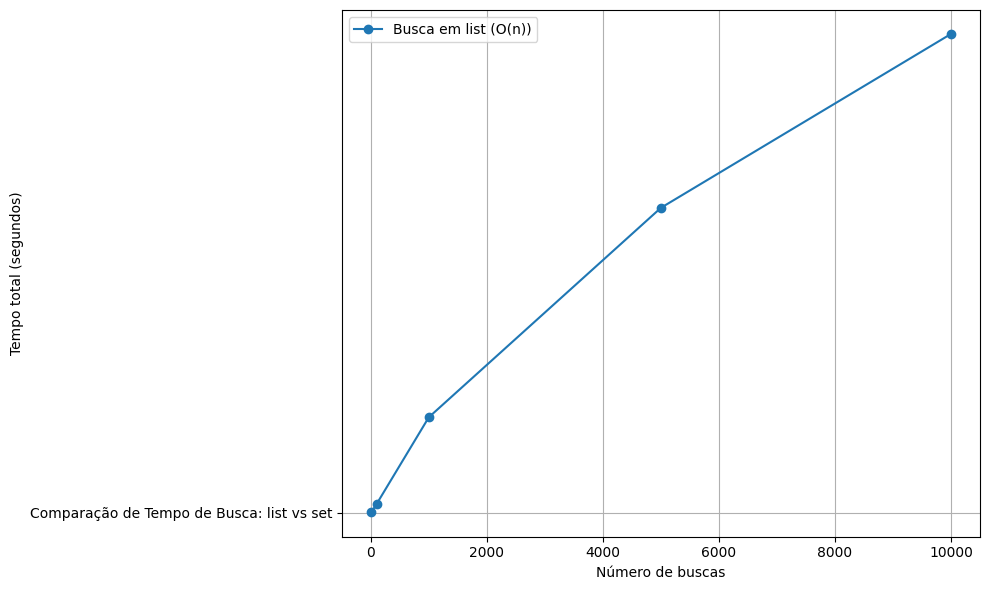

In [7]:
import random
import timeit
import matplotlib.pyplot as plt
# Gerar dados: lista com 10.000 elementos únicos
dados = random.sample(range(1,20000), 10000)
alvo = dados[-1] # Pior caso: último elemento
lista = dados
conjunto = set(dados)
# Medir tempo para diferentes quantidades de busca
quantidades = [10, 100, 1000, 5000, 10000]
tempos_lista = []
tempos_set = []
for n in quantidades:
    tempo_lista = timeit.timeit(stmt='alvo in lista', globals=globals(),  number=n)
    tempo_set = timeit.timeit(stmt='alvo in conjunto', globals=globals(), number=n)
    tempos_lista.append(tempo_lista)
    tempos_set.append(tempo_set)
# Mostrar resultados numéricos
print("🔍 Comparação de tempo total para diferentes quantidades de buscas:")
for i, n in enumerate(quantidades):
    print(f"{n:>5} buscas - list: {tempos_lista[i]:.6f}s | set: {tempos_set[i]:.6f}s")
# Plotar gráfico
plt.figure(figsize=(10,6))
plt.plot(quantidades, tempos_lista, marker='o', label='Busca em list (O(n))')
plt.plot('Comparação de Tempo de Busca: list vs set')
plt.xlabel('Número de buscas')
plt.ylabel('Tempo total (segundos)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


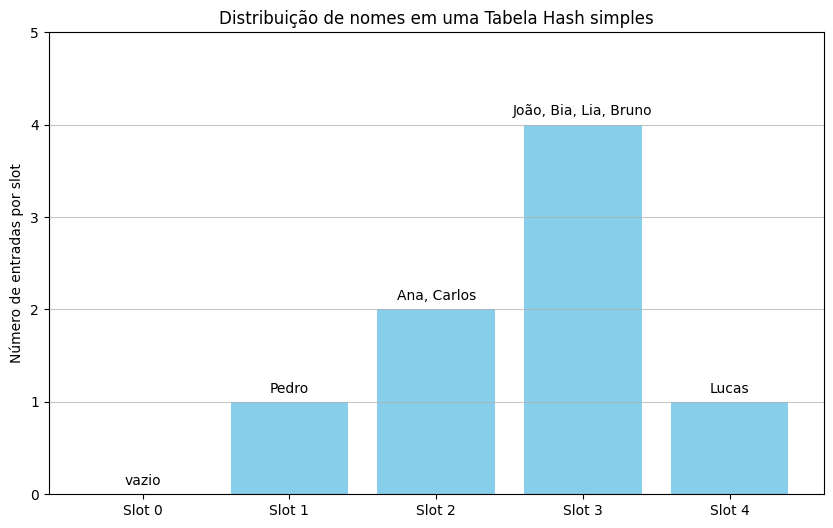

In [8]:
import matplotlib.pyplot as plt
# Tamanho da tabela hash
tamanho = 5
# Nomes fictícios para simular inserção
entradas = ["João", "Ana", "Bia", "Carlos", "Lucas", "Lia", "Pedro", "Bruno"]
# Criar tabela hash como lista de listas (encadeamento)
hash_slots = [[] for _ in range(tamanho)]
# Função hash simples: soma dos códigos dos caracteres da chave
def hash_simples (chave):
    return sum(ord(c) for c in chave) % tamanho
# Inserir nomes na tabela usando a função hash
for nome in entradas:
    indice = hash_simples(nome)
    hash_slots [indice].append(nome)
# Preparar os dados para o gráfico
labels = [f"Slot {i}" for i in range(tamanho)]
valores = [len(slot) for slot in hash_slots]
conteudo = [", ".join(slot) if slot else "vazio" for slot in hash_slots]
# Plotar o gráfico
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(labels, valores, color='skyblue')
# Adicionar rótulos com os nomes nas barras
for bar, texto in zip(bars, conteudo):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, texto, ha='center', fontsize=10)
plt.title("Distribuição de nomes em uma Tabela Hash simples")
plt.ylabel("Número de entradas por slot")
plt.ylim(0, max (valores)+1)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

In [10]:
from faker import Faker
fake = Faker('pt_BR')
# Criar um dicionário com dados de 5 clientes
clientes = {}
for _ in range(5):
    nome = fake.name()
    dados = {
        'CPF': fake.cpf(),
        'Email': fake.email(),
        'Endereço': fake.address(),
        'Data de Nascimento': fake.date_of_birth (minimum_age=18, maximum_age=65)
    }
    clientes [nome] = dados
# Exibir os dados
for nome, info in clientes.items():
    print(f"Cliente: {nome}")
for chave, valor in info.items():
    print(f" {chave}: {valor}")
print("-" * 40)

Cliente: Dr. Erick Camargo
Cliente: Isabela Fernandes
Cliente: Giovanna Albuquerque
Cliente: Pietro Albuquerque
Cliente: Ana Luiza Azevedo
 CPF: 274.085.619-94
 Email: da-cunhaclarice@example.org
 Endereço: Feira Rocha, 20
Solimoes
11070439 da Mota do Campo / RJ
 Data de Nascimento: 1998-01-03
----------------------------------------


In [11]:
from faker import Faker
import timeit
import random
fake = Faker()
#Criar dicionário com 10 pares
dict_10 = {fake.name(): fake.email() for _ in range(10)}
chave_10 = list(dict_10.keys()) [-1] # última chave (pior caso hipotético)
# Criar dicionário com 10.000 pares
dict_10000 = {fake.name(): fake.email() for _ in range(10000)}
chave_10000 = list(dict_10000.keys())[-1]
# Teste de tempo para 10 buscas
tempo_10 = timeit.timeit(stmt="chave_10 in dict_10", globals=globals(), number=10000)
tempo_10000 = timeit.timeit(stmt="chave_10000 in dict_10000", globals=globals(), number=10000)
print(" Tempo total para 10.000 buscas:")
print(f"Dicionário com 10 elementos: {tempo_10:.6f} segundos")
print(f"Dicionário com 10.000 elementos: {tempo_10000:.6f} segundos")

 Tempo total para 10.000 buscas:
Dicionário com 10 elementos: 0.000341 segundos
Dicionário com 10.000 elementos: 0.000276 segundos


In [15]:
# Criando uma tupla com três elementos
coordenadas = (3.5, 7.2, 0.0)
# Exibindo a tupla
print("Tupla:", coordenadas)
# Tentando alterar um valor (isso vai gerar erro!)
try:
    coordenadas[0] = 10
except TypeError as e:
    print("Erro ao tentar alterar a tupla:", e)
# Acessando um valor (busca 0(1))
print("Segundo valor (índice 1):", coordenadas [1])
# Verificando se um valor existe (ainda é 0(n), mas acesso direto por índice é 0(1))
print("Existe o valor 7.2?", 7.2 in coordenadas)
# Tuplas são úteis quando os dados são fixos, ex:
PI = (3.14159,) # vírgula é obrigatória se for uma tupla com 1 item
RGB_BRANCO = (255, 255, 255)
dias_da_semana = ('segunda', 'terça', 'quarta', 'quinta', 'sexta', 'sábado', 'domingo')
# Tuplas podem ser usadas como chaves em dicionários (por serem imutáveis)
cidades = {
    ('São Paulo', 'SP'): 12_000_000,
    ('Rio de Janeiro', 'RJ'): 6_700_000
}
print("População de São Paulo:", cidades[('São Paulo', 'SP')])

Tupla: (3.5, 7.2, 0.0)
Erro ao tentar alterar a tupla: 'tuple' object does not support item assignment
Segundo valor (índice 1): 7.2
Existe o valor 7.2? True
População de São Paulo: 12000000
